In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.patches import Circle, Wedge
import seaborn as sns
from matplotlib.animation import FuncAnimation

import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
from field_map_g4bl import readFieldMapData
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '../../..'))
sys.path.append(parent_dir)
from functions.set_plot_settings import setPlotSettings
setPlotSettings(font=True)

# Animation directory:
ani_dir = 'animations/'

### Plot transverse slice at given z

In [17]:
data = readFieldMapData('fieldmap.txt')

In [20]:
z_val = 0.0

data_slice = data[data['z'] == z_val]

x_unique = np.sort(data_slice['x'].unique())
y_unique = np.sort(data_slice['y'].unique())
X, Y = np.meshgrid(x_unique, y_unique)

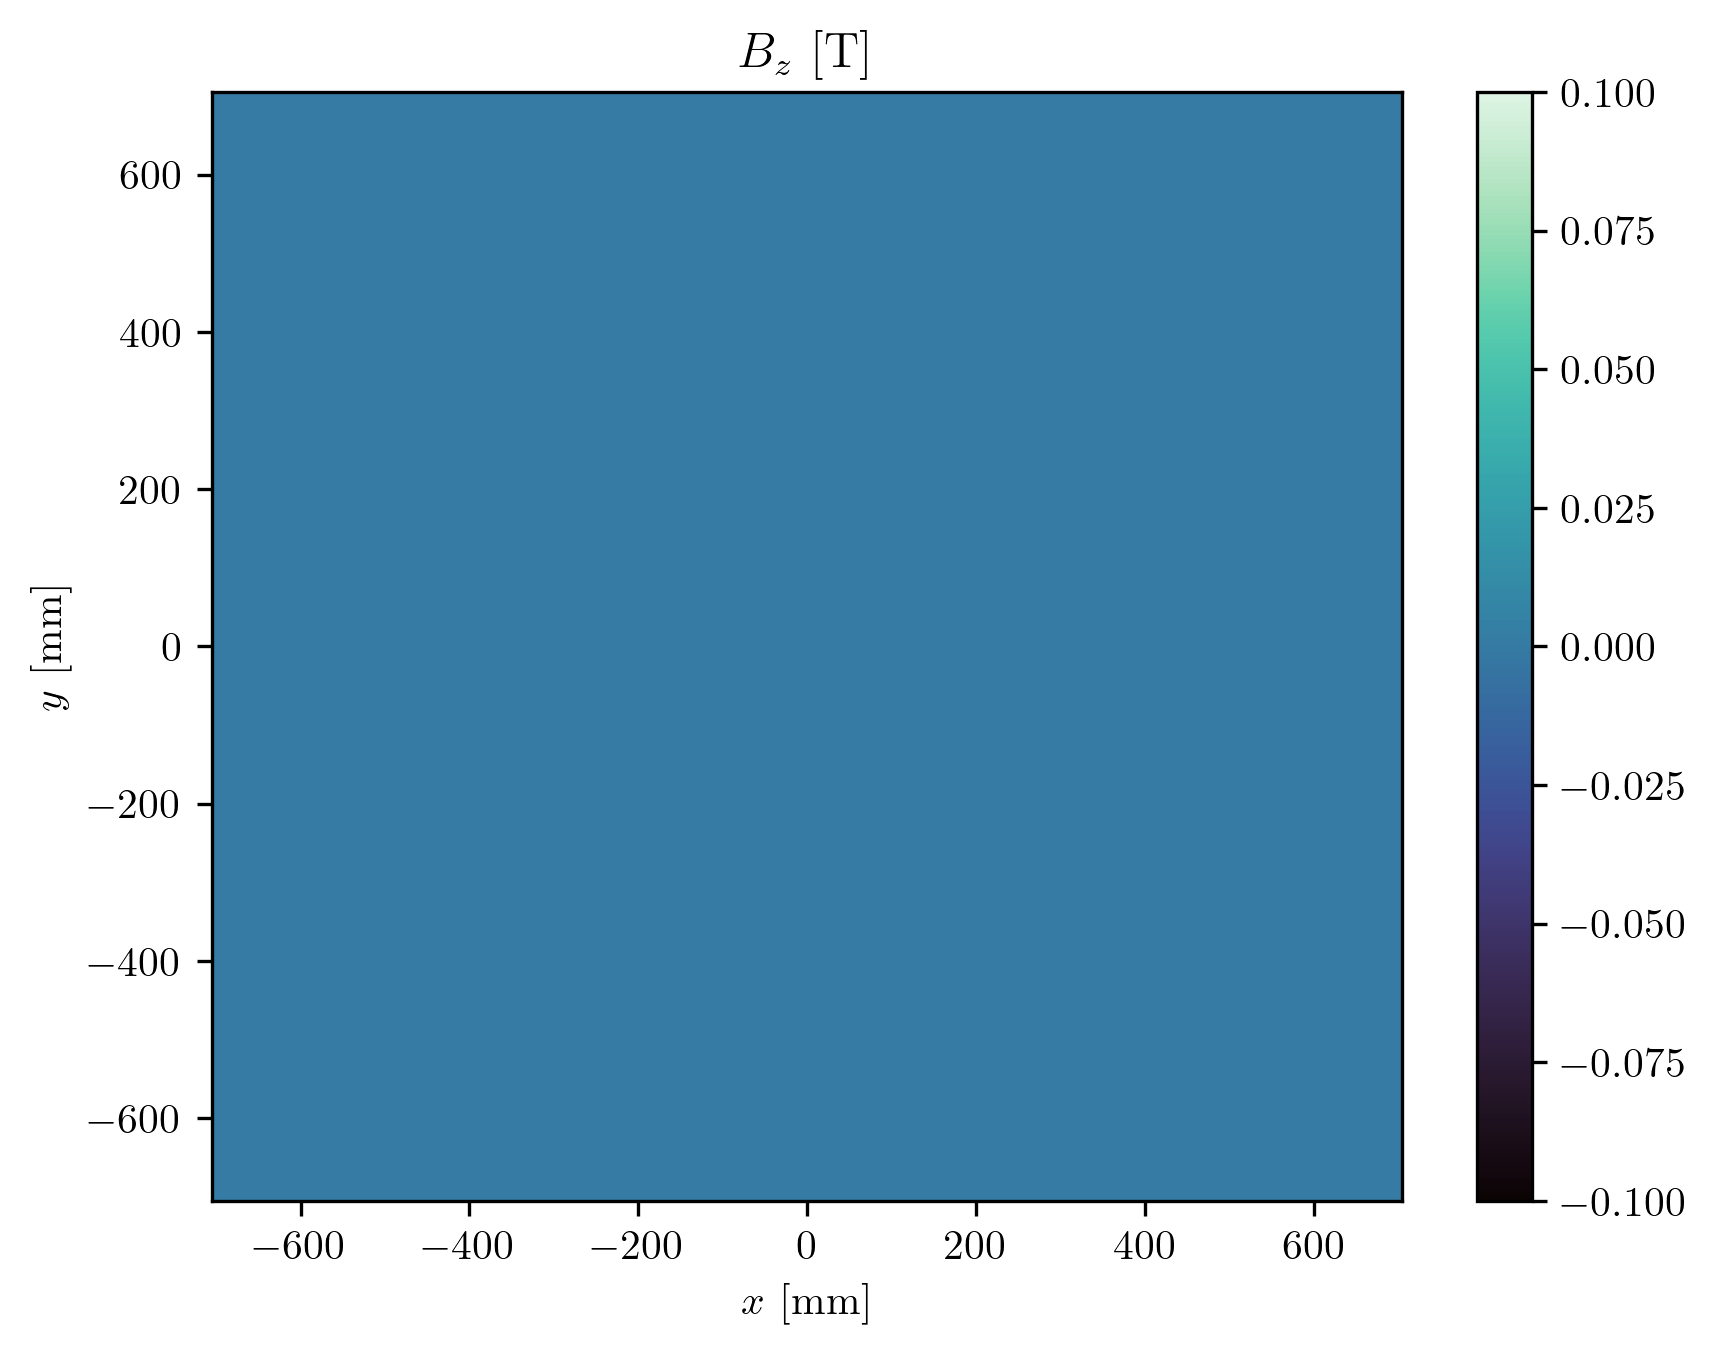

In [21]:
########## B_z ##########

Bz_pivot = data_slice.pivot_table(index='y', columns='x', values='Bz' )
Bz_grid = Bz_pivot.values

fig, ax = plt.subplots()
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Bz_grid, cmap=cmap, shading='auto', vmin=data_slice['Bz'].min(), vmax=data_slice['Bz'].max())
plt.colorbar(pcm)
plt.xlabel('$x$ [mm]')
plt.ylabel('$y$ [mm]')
plt.title('$B_z$ [T]')
plt.show()

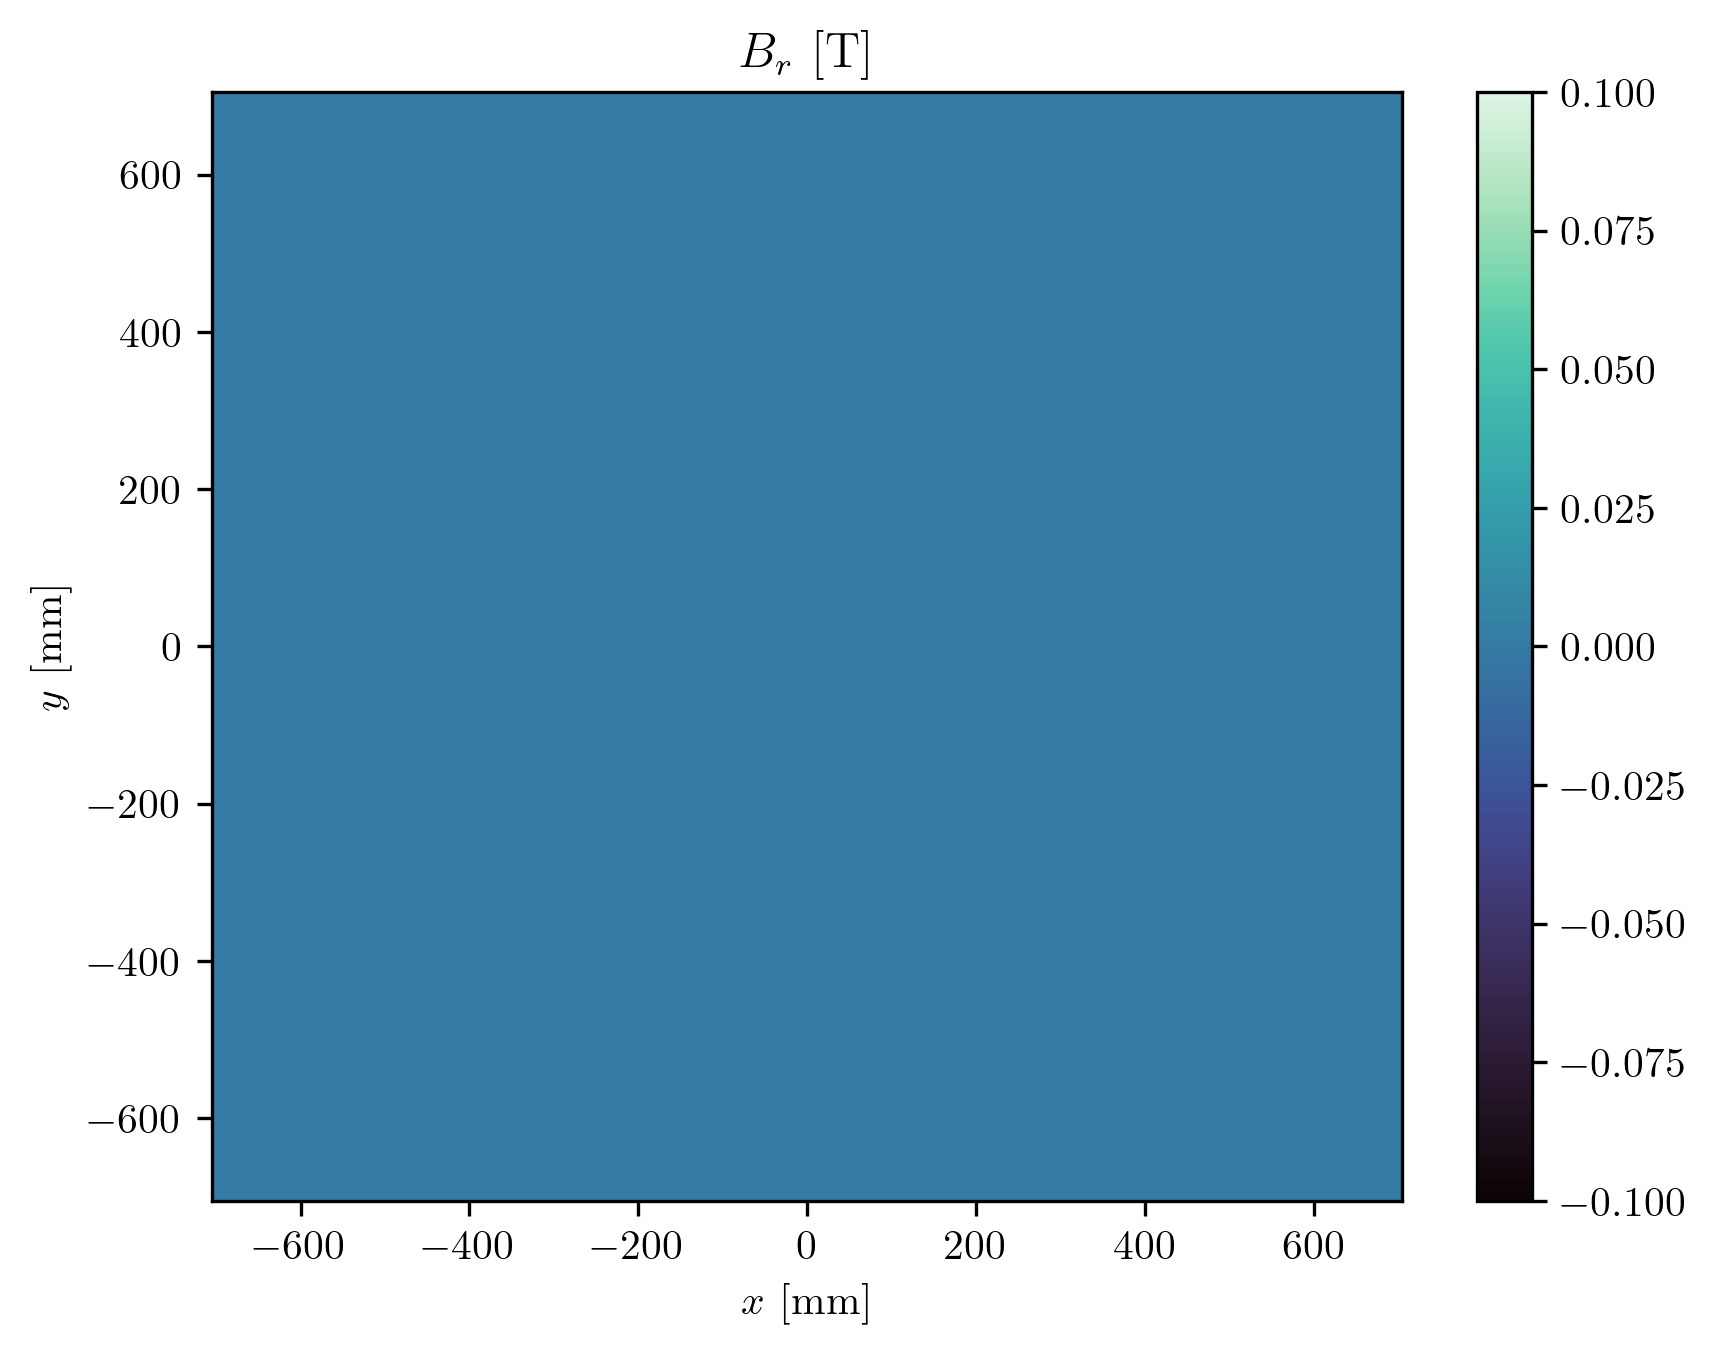

In [22]:
########## B_r ##########

Br_pivot = data_slice.pivot_table(index='y', columns='x', values='Br' )
Br_grid = Br_pivot.values

fig, ax = plt.subplots()
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Br_grid, cmap=cmap, shading='auto', vmin=data_slice['Br'].min(), vmax=data_slice['Br'].max())
plt.colorbar(pcm)
plt.xlabel('$x$ [mm]')
plt.ylabel('$y$ [mm]')
plt.title('$B_r$ [T]')
plt.show()

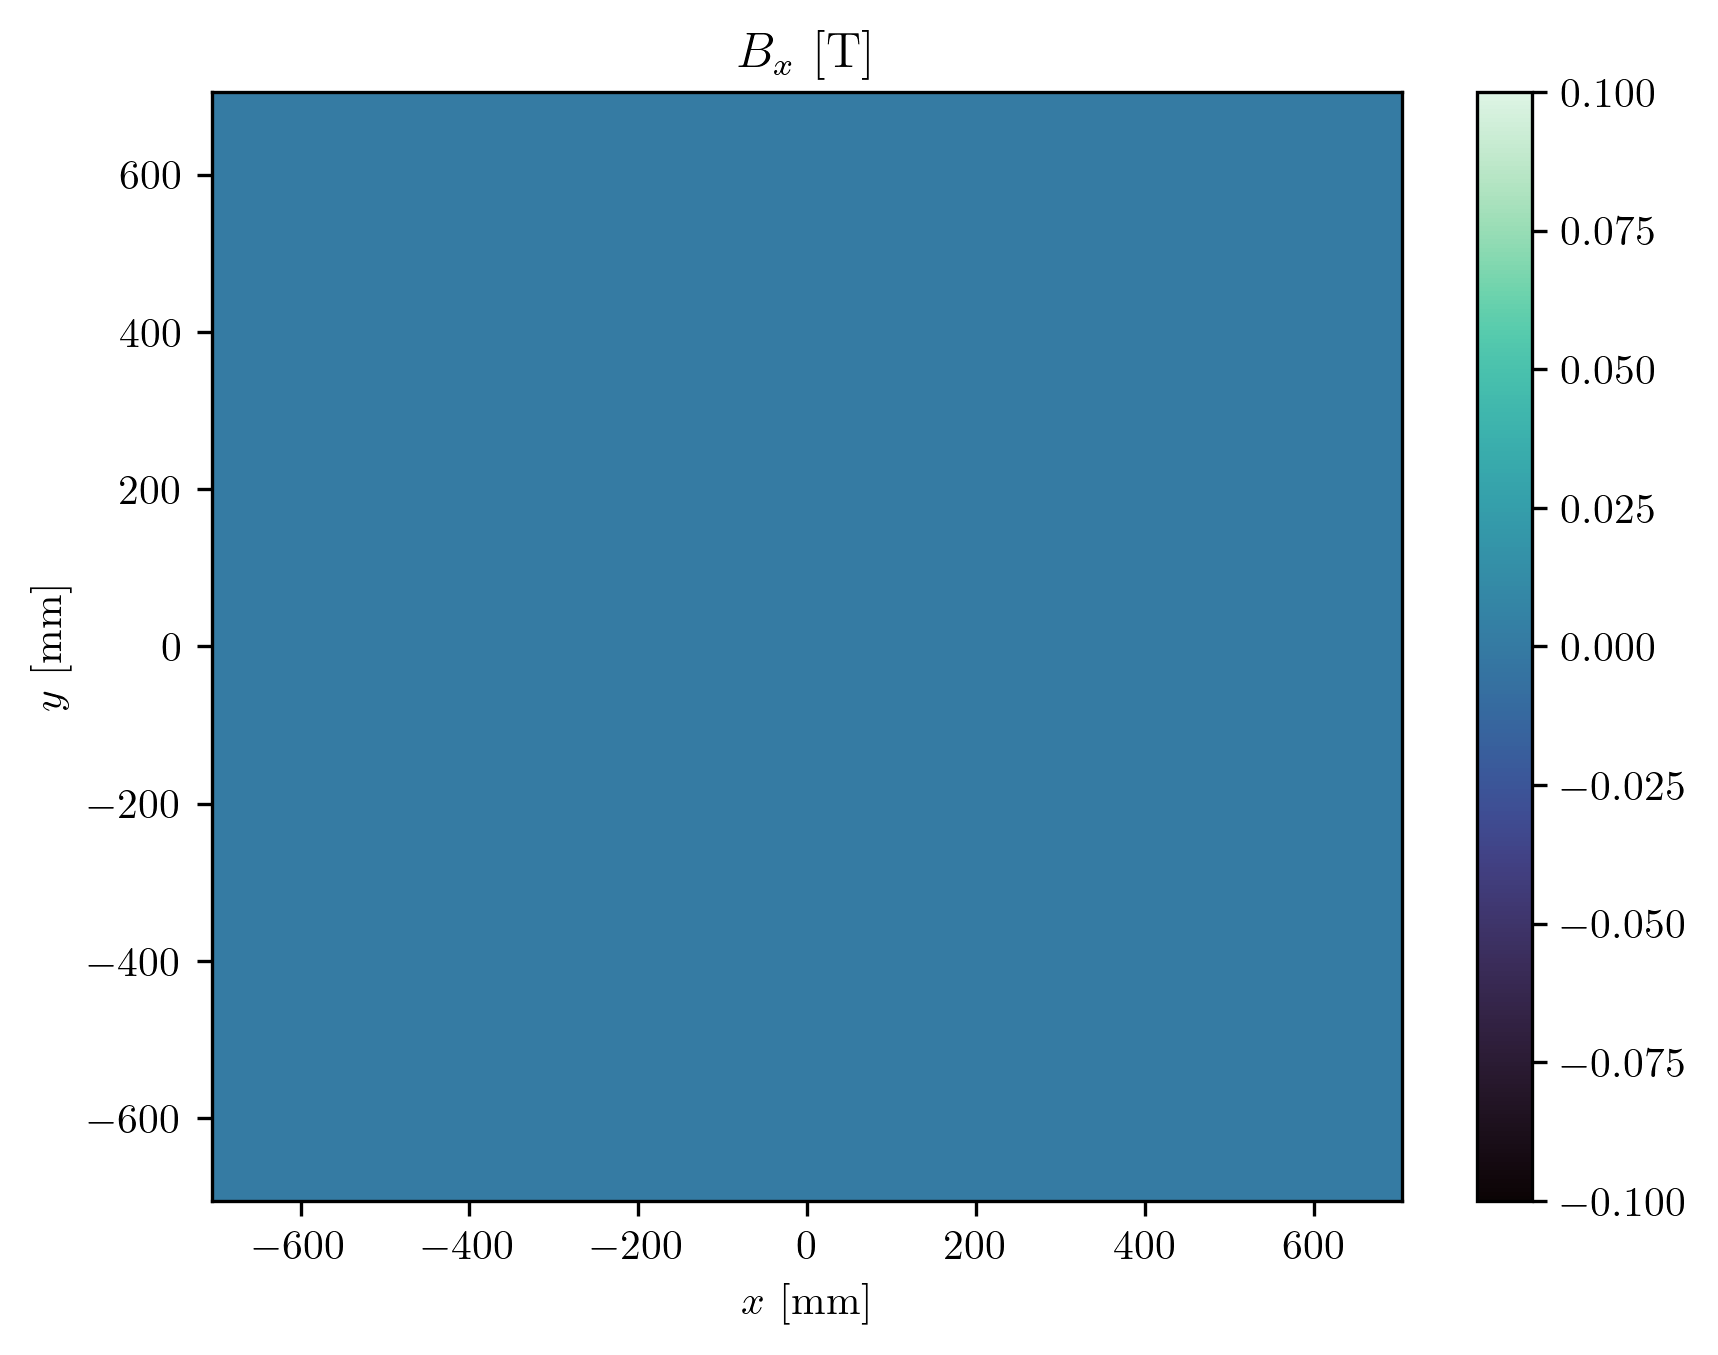

In [23]:
########## B_x ##########

Bx_pivot = data_slice.pivot_table(index='y', columns='x', values='Bx' )
Bx_grid = Br_pivot.values

fig, ax = plt.subplots()
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Bx_grid, cmap=cmap, shading='auto', vmin=data_slice['Bx'].min(), vmax=data_slice['Bx'].max())
plt.colorbar(pcm)
plt.xlabel('$x$ [mm]')
plt.ylabel('$y$ [mm]')
plt.title('$B_x$ [T]')
plt.show()

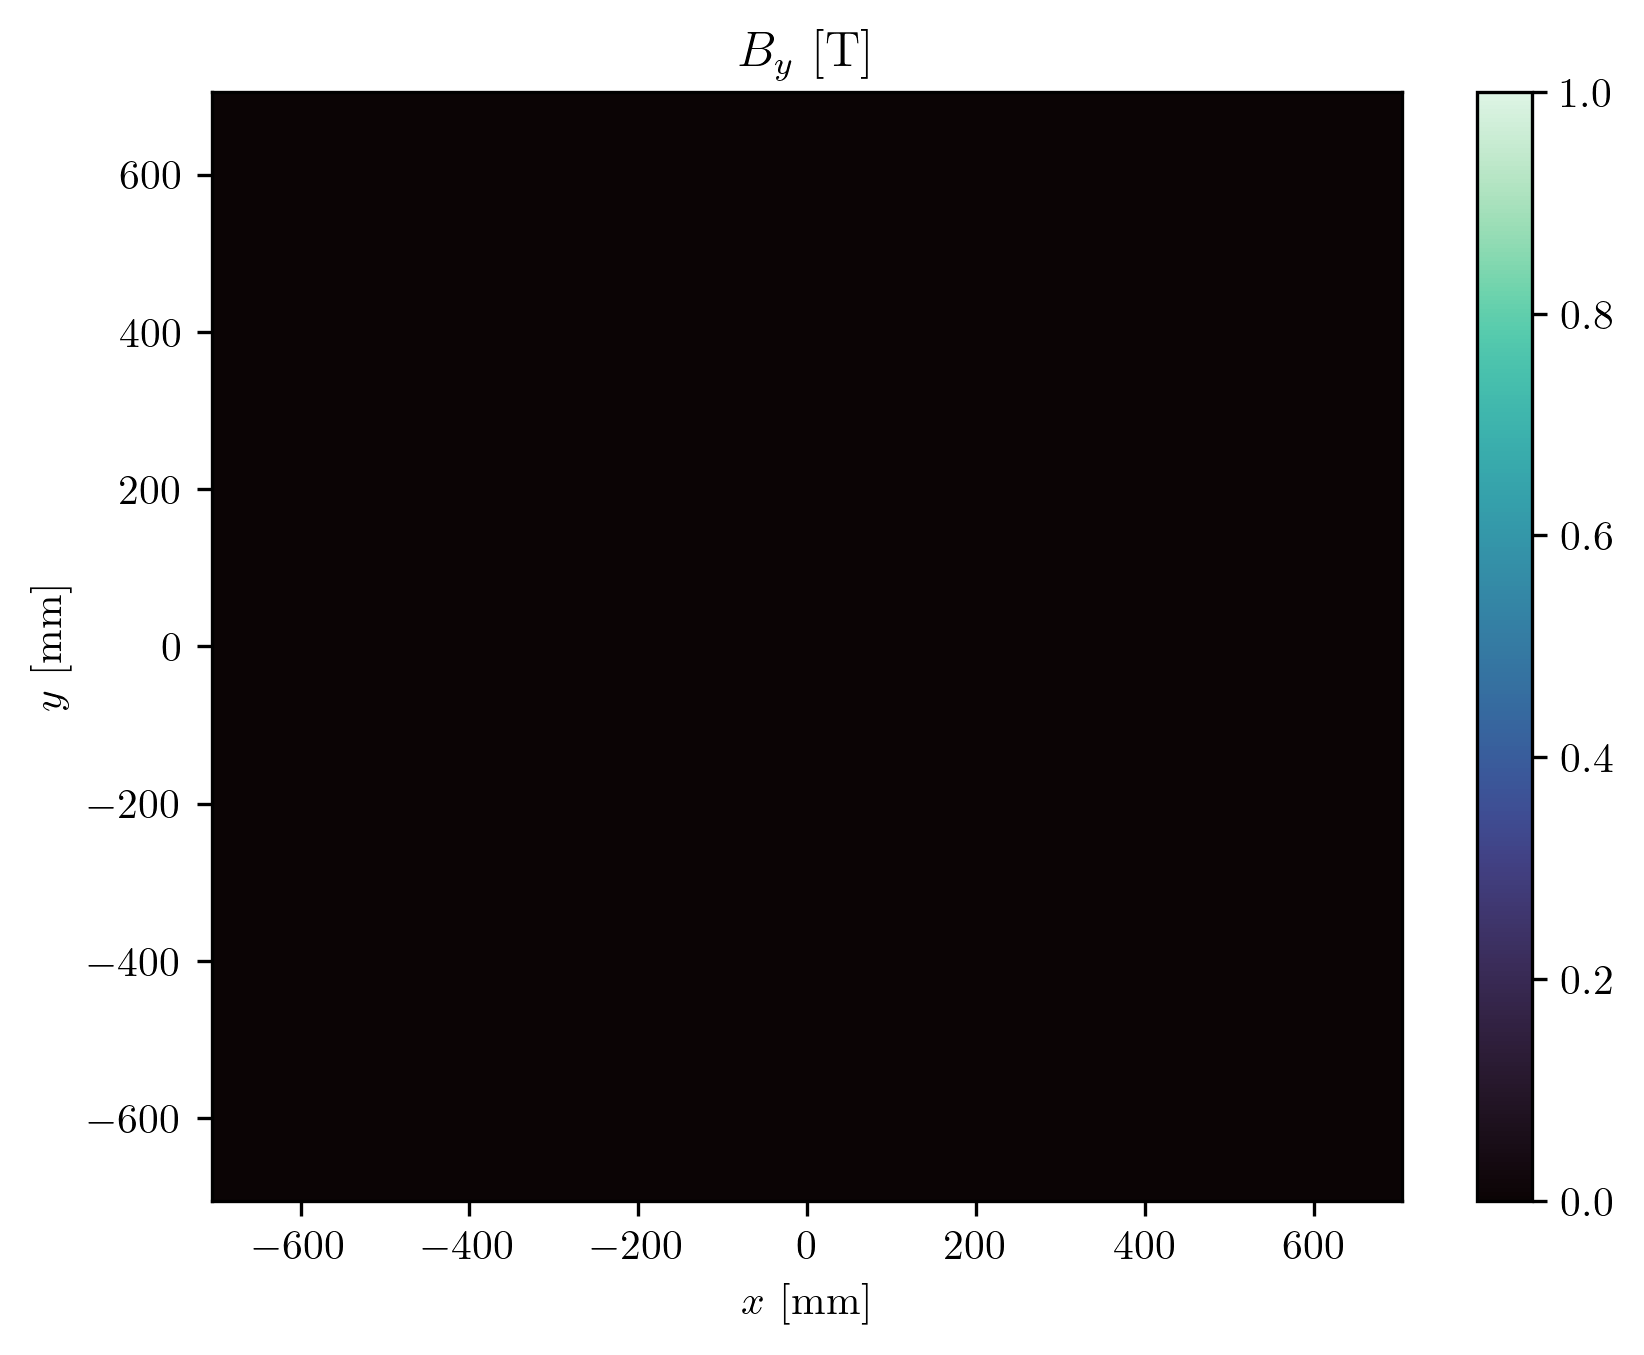

In [24]:
########## B_y ##########

By_pivot = data_slice.pivot_table(index='y', columns='x', values='By' )
By_grid = Br_pivot.values

fig, ax = plt.subplots()
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, By_grid, cmap=cmap, shading='auto', vmin=data_slice['By'].min(), vmax=data_slice['By'].max())
plt.colorbar(pcm)
plt.xlabel('$x$ [mm]')
plt.ylabel('$y$ [mm]')
plt.title('$B_y$ [T]')
plt.show()

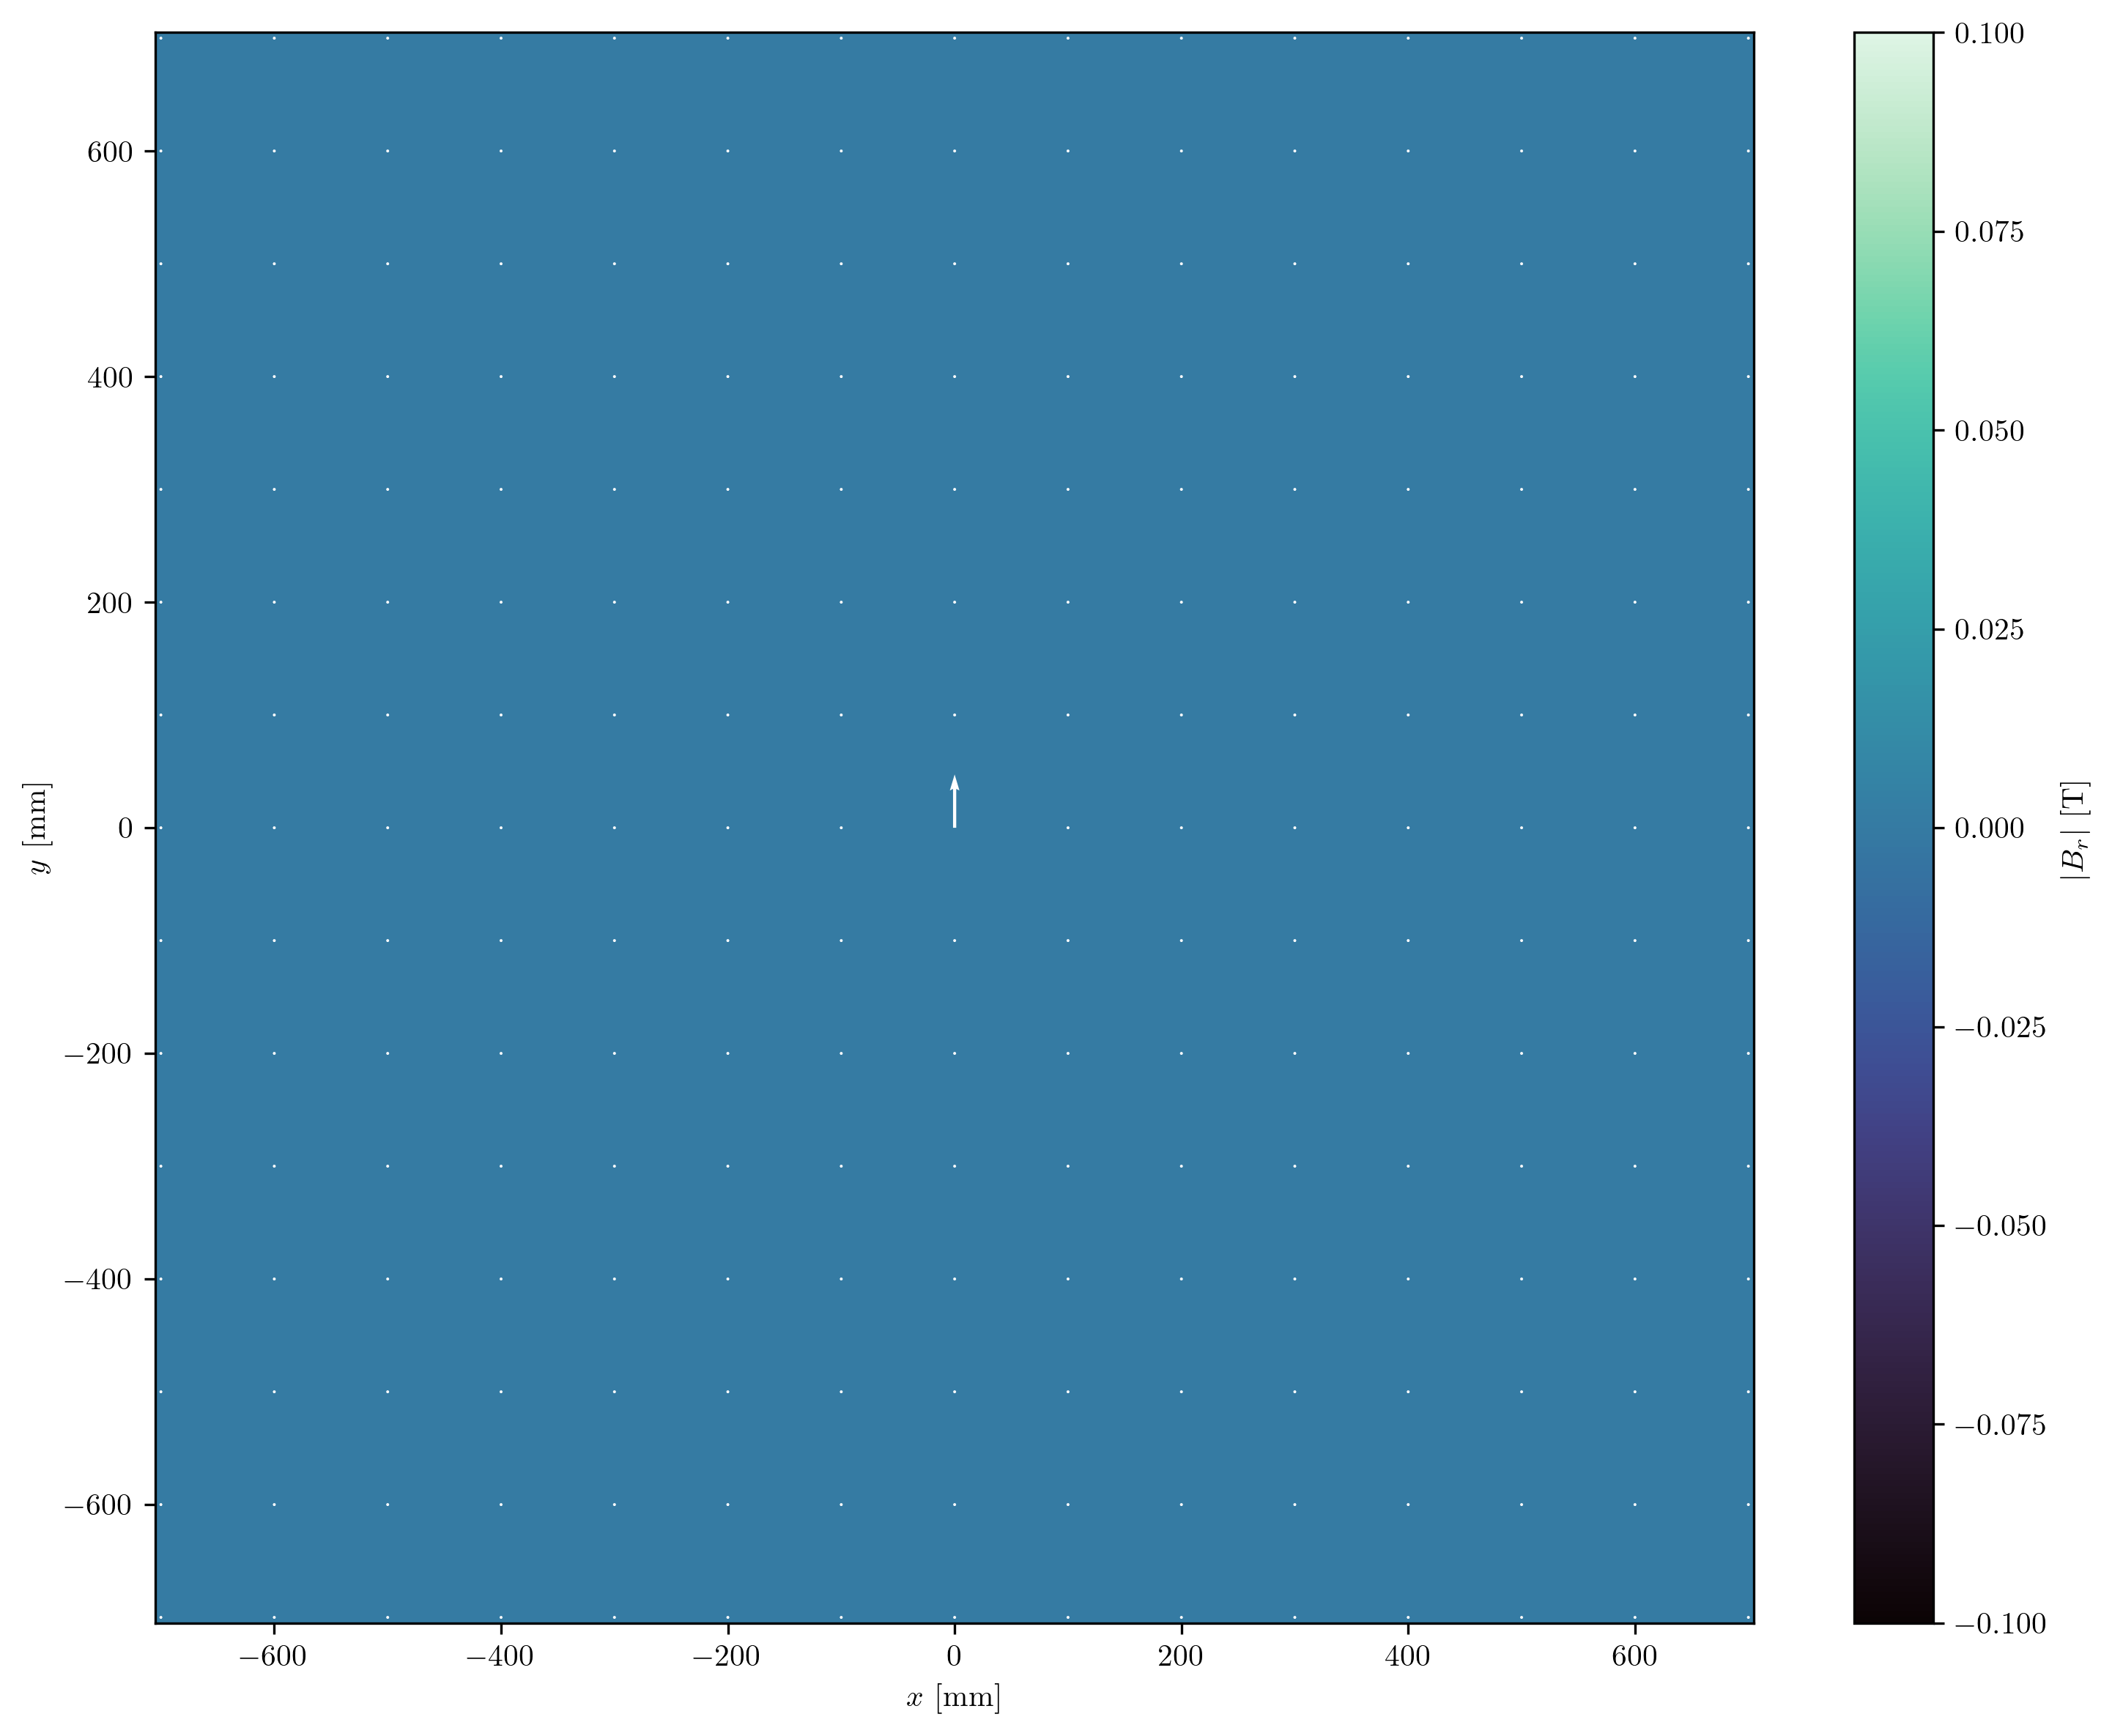

In [25]:
########## VECTOR PLOT OF TRANSVERSE FIELD ##########

Bx_grid = data_slice.pivot_table(index='y', columns='x', values='Bx').values
By_grid = data_slice.pivot_table(index='y', columns='x', values='By').values

step = 10
X_ds = X[::step, ::step]
Y_ds = Y[::step, ::step]
Bx_ds = Bx_grid[::step, ::step]
By_ds = By_grid[::step, ::step]

magnitude = np.sqrt(Bx_ds**2 + By_ds**2)
Bx_norm = Bx_ds / (magnitude + 1e-12)
By_norm = By_ds / (magnitude + 1e-12)

fig, ax = plt.subplots(figsize=(10, 8))
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Br_grid, cmap=cmap, shading='auto', vmin=data_slice['Br'].min(), vmax=data_slice['Br'].max())
plt.colorbar(pcm, ax=ax, label='$|B_r|$ [T]')

ax.quiver(X_ds, Y_ds, Bx_norm, By_norm, color='white', scale=30, width=0.002, zorder=10)

ax.set_xlabel('$x$ [mm]')
ax.set_ylabel('$y$ [mm]')
plt.tight_layout()
plt.show()

### Animated field map for transverse slice along z

In [46]:
unique_z = np.sort(data['z'].unique())
init_data = data[data['z'] == unique_z[0]]
x_unique = np.sort(init_data['x'].unique())
y_unique = np.sort(init_data['y'].unique())
X, Y = np.meshgrid(x_unique, y_unique)

In [52]:
data_slice_init = data[data['z'] == unique_z[0]]
Br_pivot_init = data_slice_init.pivot_table(index='y', columns='x', values='Br')
Br_init = Br_pivot_init.values

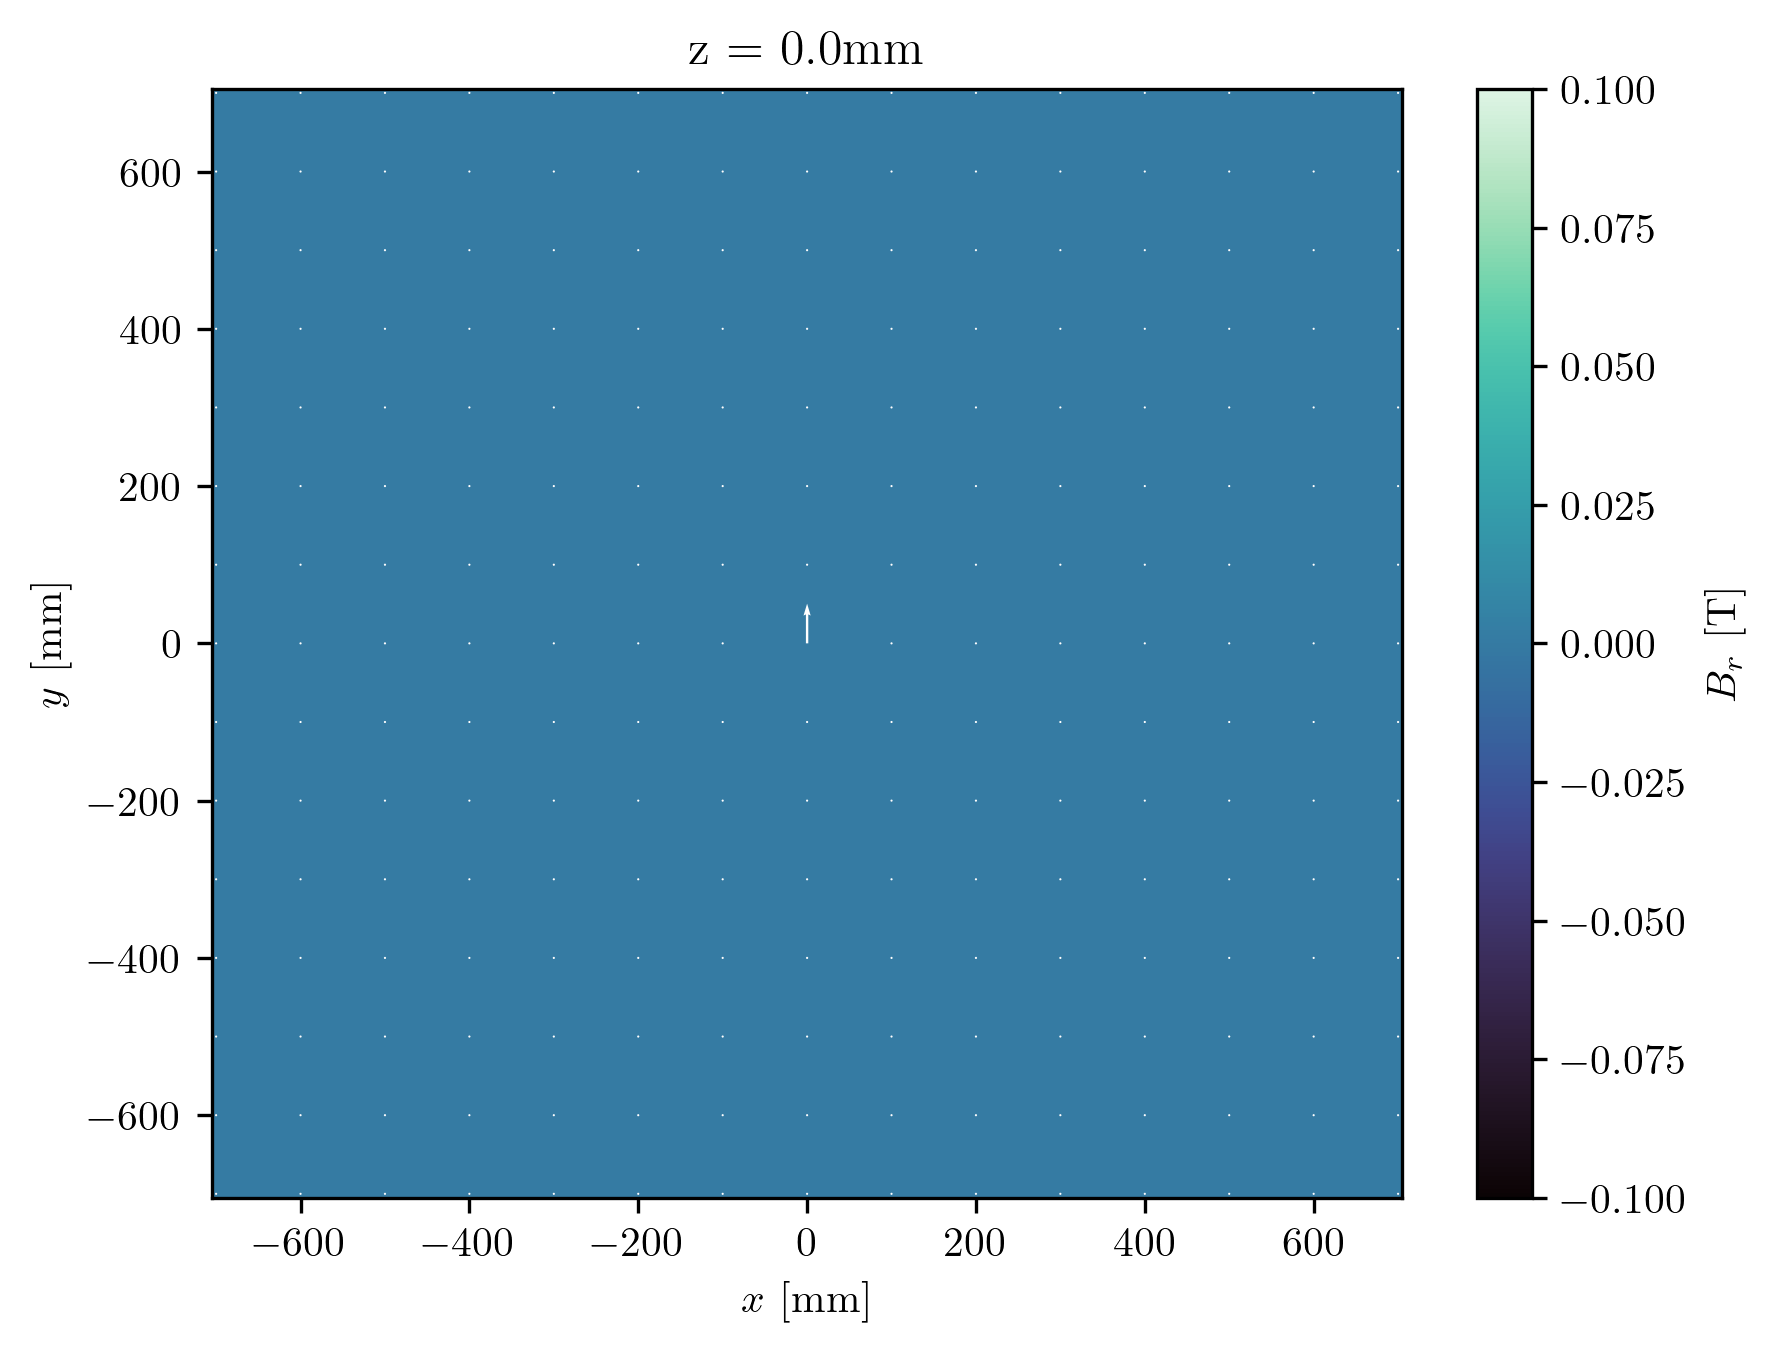

In [53]:
########## B_r (vector) ##########

fig, ax = plt.subplots()

ax.set_xlabel('$x$ [mm]')
ax.set_ylabel('$y$ [mm]')

cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Br_init, cmap=cmap)
cbar = plt.colorbar(pcm, ax=ax, label='$B_r$ [T]')

quiver_plot = None

step = 10

def animate(frame):
    global quiver_plot

    z_val = unique_z[frame]

    data_slice = data[data['z'] == z_val]

    Bx_grid = data_slice.pivot_table(index='y', columns='x', values='Bx').values
    By_grid = data_slice.pivot_table(index='y', columns='x', values='By').values
    Br_grid = data_slice.pivot_table(index='y', columns='x', values='Br').values

    X_ds = X[::step, ::step]
    Y_ds = Y[::step, ::step]
    Bx_ds = Bx_grid[::step, ::step]
    By_ds = By_grid[::step, ::step]

    magnitude = np.sqrt(Bx_ds**2 + By_ds**2)
    Bx_norm = Bx_ds / (magnitude + 1e-12)
    By_norm = By_ds / (magnitude + 1e-12)

    pcm.set_array(Br_grid.ravel())

    if quiver_plot:
        quiver_plot.remove()

    quiver_plot = ax.quiver(X_ds, Y_ds, Bx_norm, By_norm, color='white', scale=30, width=0.002, zorder=10)

    ax.set_title(f'z = {z_val}mm')

    return [pcm, quiver_plot]

animation = FuncAnimation(fig, animate, frames=len(unique_z), interval=100, blit=False, repeat=False)
animation.save(ani_dir+'Br_vector.gif', writer='pillow')

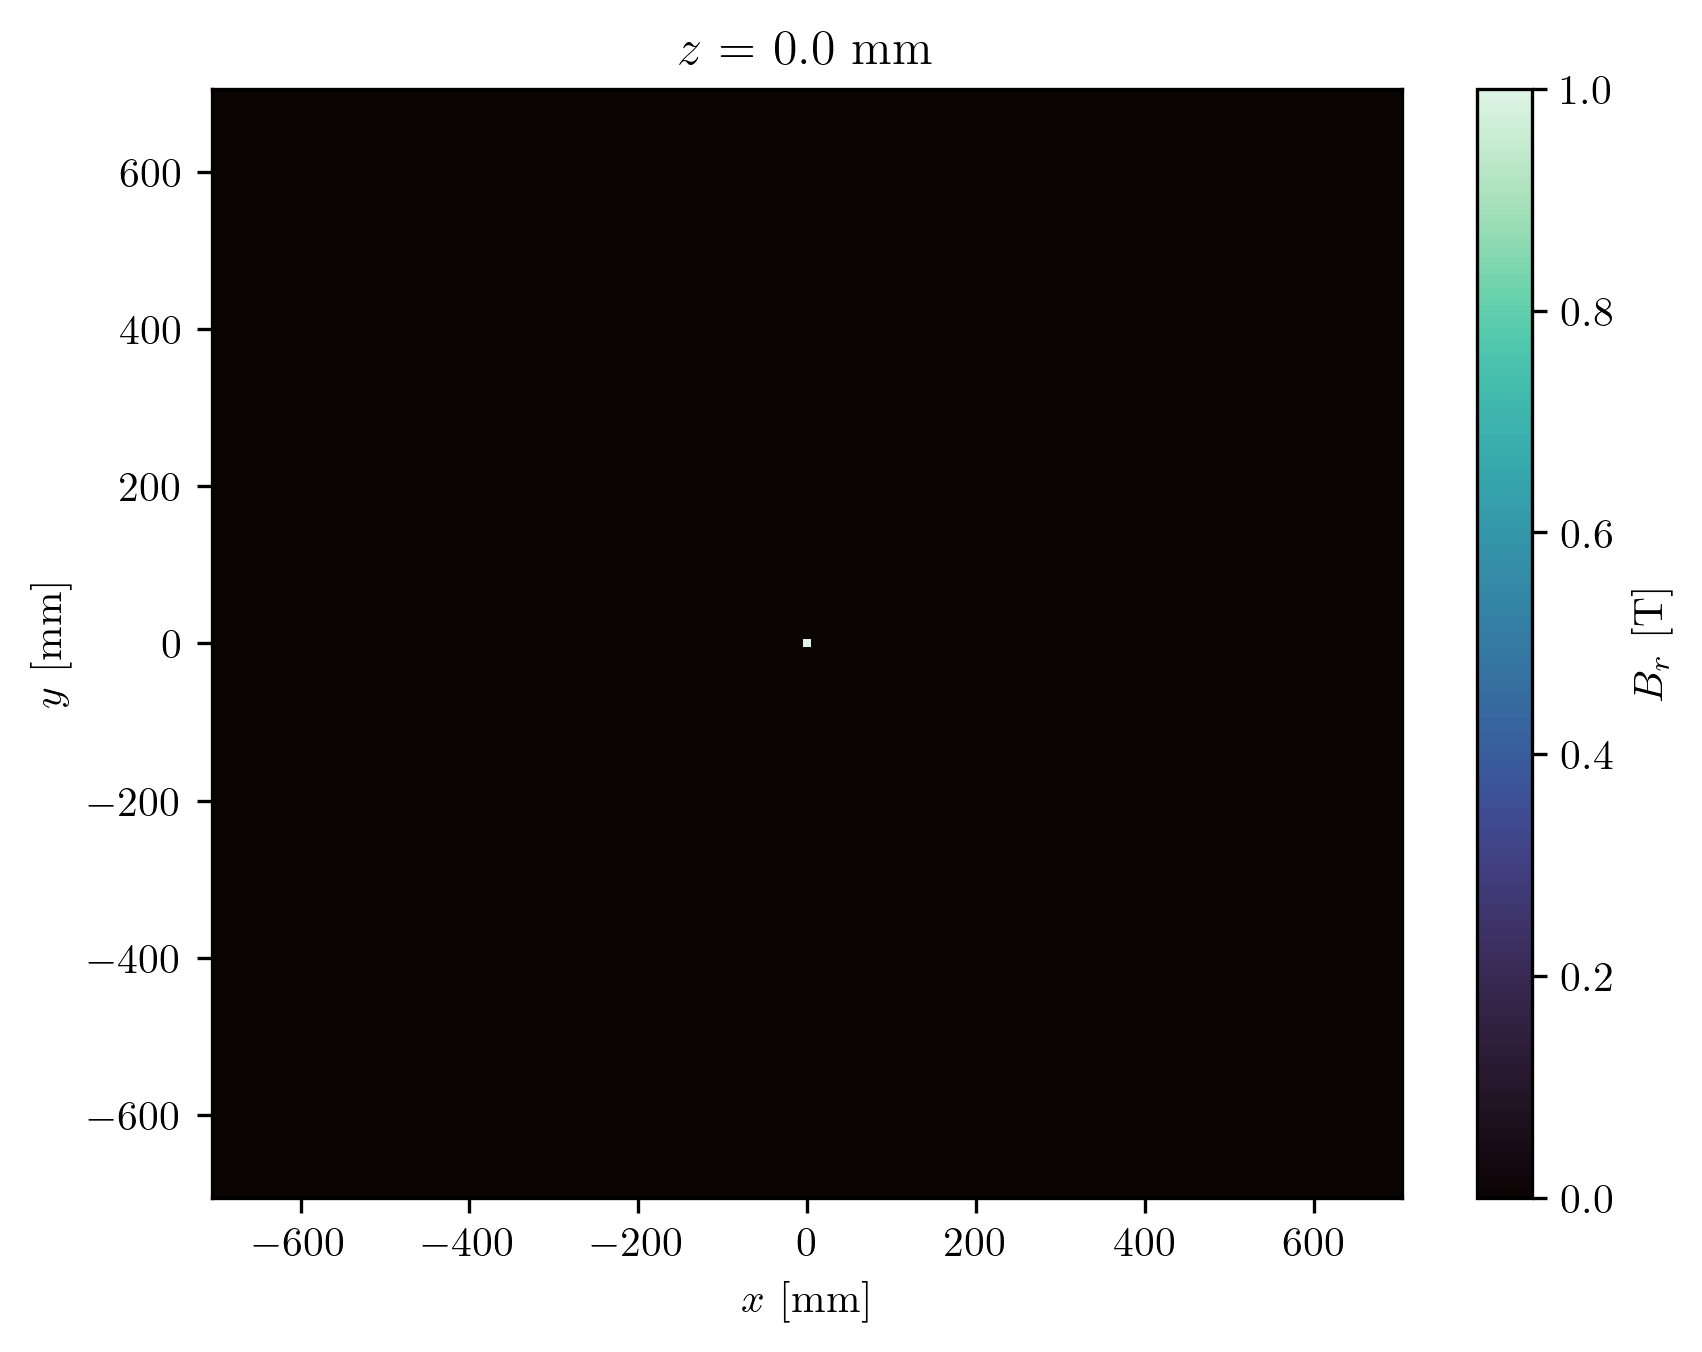

In [55]:
########## B_y (magnitude) ##########

By_init = data_slice_init.pivot_table(index='y', columns='x', values='By').values

fig, ax = plt.subplots()
ax.set_xlabel('$x$ [mm]')
ax.set_ylabel('$y$ [mm]')
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, By_init, cmap=cmap, shading='auto', vmin=data['By'].min(), vmax=data['By'].max())
cbar = plt.colorbar(pcm, ax=ax, label='$B_r$ [T]')

def animate(frame):

    ax.set_title(f'$z$ = {unique_z[frame]} mm')

    data_slice = data[data['z'] == unique_z[frame]]
    By_grid = data_slice.pivot_table(index='y', columns='x', values='By').values
    pcm.set_array(By_grid.ravel())
    return [pcm]

animation = FuncAnimation(fig, animate, frames=len(unique_z), interval=100, blit=False, repeat=True)
animation.save(ani_dir+'By.gif', writer='pillow')